In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

In [2]:
training_data = pd.read_csv('./datasets/Train_data.csv', index_col=0)
testing_data = pd.read_csv('./datasets/Test_data.csv', index_col=0)
training_data.head()

,avg_trip_distance_hour,avg_fare_amount_hour,avg_tolls_amount_hour,avg_tip_amount_hour,avg_Brooklyn_PU_hour,avg_Manhattan_PU_hour,avg_Queens_PU_hour,avg_Staten_Island_PU_hour,avg_Bronx_DO_hour,avg_Brooklyn_DO_hour,...,avg_Queens_DO_hour,avg_Staten_Island_DO_hour,avg_Mins_In_Ride_hour,Year,Month,Day,Hour,Minute,Second,avg_total_amount_hour
902,1.716836,9.837774,0.000649,1.713450,0.006721,0.976207,0.016222,0.0,0.001777,0.015682,...,0.017381,0.0,12.468015,2020.0,2.0,7.0,15.0,0.0,0.0,14.941477
1662,2.177231,9.241164,0.000570,1.524831,0.019652,0.936070,0.041542,0.0,0.003731,0.015423,...,0.030597,0.0,8.979179,2020.0,3.0,10.0,7.0,0.0,0.0,14.548219
4061,2.376608,9.451111,0.000000,1.135965,0.029240,0.935673,0.035088,0.0,0.005848,0.035088,...,0.035088,0.0,7.618304,2020.0,6.0,18.0,6.0,0.0,0.0,13.509466
4276,4.196867,15.776386,0.000000,1.254699,0.072289,0.759036,0.120482,0.0,0.084337,0.060241,...,0.156627,0.0,12.454337,2020.0,6.0,27.0,5.0,0.0,0.0,15.934359
1772,2.174408,9.309273,0.000672,1.625397,0.008639,0.959683,0.029998,0.0,0.007439,0.032157,...,0.035277,0.0,9.193669,2020.0,3.0,14.0,21.0,0.0,0.0,14.904066


In [3]:
training_data = training_data.fillna(0)
testing_data = testing_data.fillna(0)

In [4]:
X_train = training_data.drop(['avg_total_amount_hour'], axis=1)
X_test = testing_data.drop(['avg_total_amount_hour'], axis=1)
y_train = training_data['avg_total_amount_hour']
y_test = testing_data['avg_total_amount_hour']

In [5]:
rfr = RandomForestRegressor(max_depth=9, n_estimators=5)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [23]:
X_test.columns

Index(['avg_trip_distance_hour', 'avg_fare_amount_hour',
       'avg_tolls_amount_hour', 'avg_tip_amount_hour', 'avg_Brooklyn_PU_hour',
       'avg_Manhattan_PU_hour', 'avg_Queens_PU_hour',
       'avg_Staten_Island_PU_hour', 'avg_Bronx_DO_hour',
       'avg_Brooklyn_DO_hour', 'avg_Manhattan_DO_hour', 'avg_Queens_DO_hour',
       'avg_Staten_Island_DO_hour', 'avg_Mins_In_Ride_hour', 'Year', 'Month',
       'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')

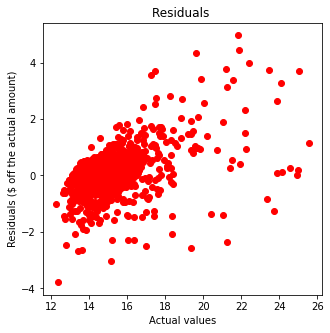

In [24]:
residuals = y_test - y_pred
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=residuals, c='red')
plt.xlabel('Actual values')
plt.ylabel('Residuals ($ off the actual  amount)')
plt.title('Residuals ')
plt.show()

In [6]:
predicted_df = X_test.join(pd.DataFrame(y_pred, index=y_test.index))
predicted_df = predicted_df.rename(columns={0:'y_pred'})
hourly_df = predicted_df.groupby('Hour').mean()
hourly_df.head()

,avg_trip_distance_hour,avg_fare_amount_hour,avg_tolls_amount_hour,avg_tip_amount_hour,avg_Brooklyn_PU_hour,avg_Manhattan_PU_hour,avg_Queens_PU_hour,avg_Staten_Island_PU_hour,avg_Bronx_DO_hour,avg_Brooklyn_DO_hour,avg_Manhattan_DO_hour,avg_Queens_DO_hour,avg_Staten_Island_DO_hour,avg_Mins_In_Ride_hour,Year,Month,Day,Minute,Second,y_pred
Hour,,,,,,,,,,,,,,,,,,,,
0,3.110593,11.800137,0.001586,1.432967,0.033847,0.883812,0.057762,0.000000,0.058944,0.081897,0.781009,0.078150,0.000000,10.945352,2020.0,3.396552,15.948276,0.0,0.0,16.357582
1,3.222159,11.985211,0.002344,1.383309,0.057136,0.860398,0.057193,0.000013,0.062862,0.113010,0.734907,0.089208,0.000013,10.972840,2020.0,3.545455,15.681818,0.0,0.0,16.676926
2,3.149727,11.931351,0.002984,1.272569,0.042392,0.888457,0.051198,0.000025,0.050536,0.089686,0.762437,0.097316,0.000025,10.652863,2020.0,3.500000,16.580000,0.0,0.0,16.738493
3,3.337989,12.417322,0.004245,1.115186,0.045337,0.878848,0.049109,0.000750,0.057995,0.100319,0.745851,0.095086,0.000750,10.760965,2020.0,3.413793,15.965517,0.0,0.0,17.309422
4,3.465088,12.687781,0.002475,1.210999,0.048915,0.878793,0.052042,0.000021,0.046804,0.097679,0.758065,0.097431,0.000021,10.927147,2020.0,3.085106,15.702128,0.0,0.0,17.053118


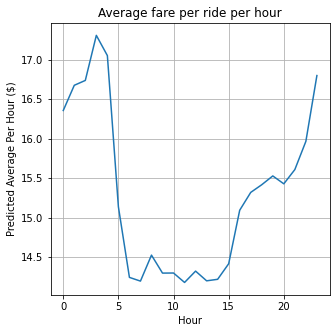

In [14]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Hour', y='y_pred', data=hourly_df)
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Predicted Average Per Hour ($)')
plt.title('Average fare per ride per hour')
plt.show()

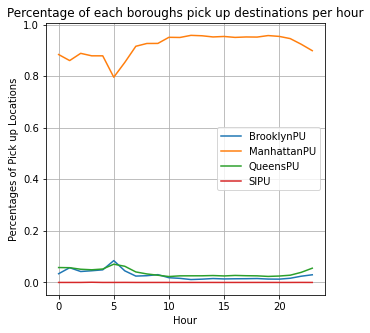

In [15]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Hour', y='avg_Brooklyn_PU_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Manhattan_PU_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Queens_PU_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Staten_Island_PU_hour', data=hourly_df)
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Percentages of Pick up Locations')
plt.title('Percentage of each boroughs pick up destinations per hour')
plt.legend(['BrooklynPU', 'ManhattanPU', 'QueensPU', 'SIPU'])
plt.show()

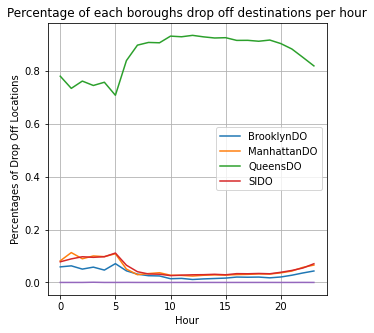

In [16]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Hour', y='avg_Bronx_DO_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Brooklyn_DO_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Manhattan_DO_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Queens_DO_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Staten_Island_DO_hour', data=hourly_df)
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Percentages of Drop Off Locations')
plt.title('Percentage of each boroughs drop off destinations per hour')
plt.legend(['BrooklynDO', 'ManhattanDO', 'QueensDO', 'SIDO'])
plt.show()